In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = 'k/test'
data_test_path = 'k/train'
data_val_path = 'k/validation'

In [4]:
img_width = 180
img_height =180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 268 files belonging to 1 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['Hurricane']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 268 files belonging to 1 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 268 files belonging to 1 classes.


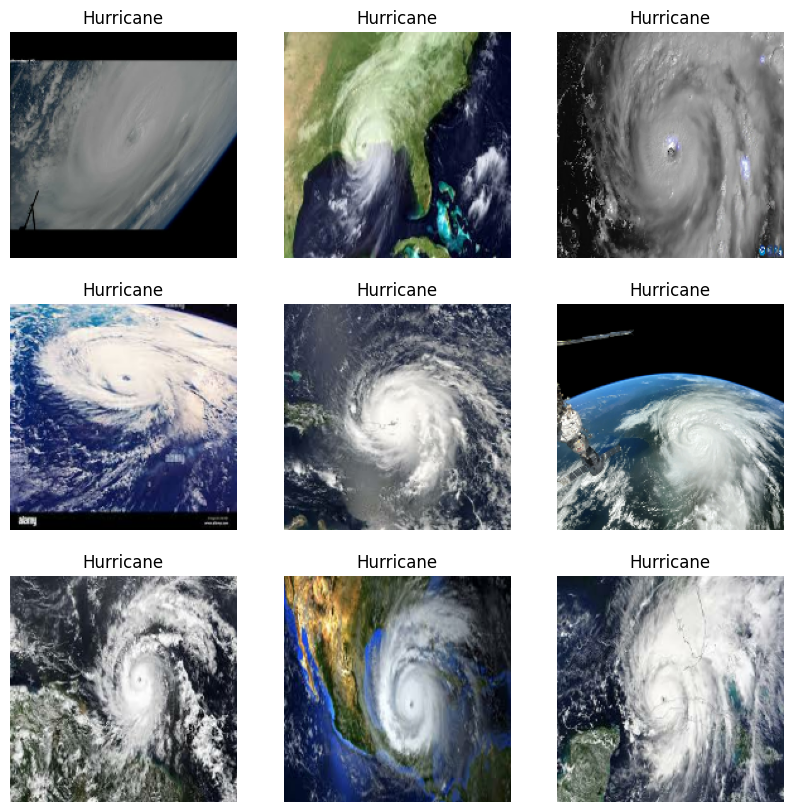

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step - accuracy: 0.9973 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - accuracy: 0.9984 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.9939 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 374ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 381ms/step - accuracy: 

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:

import io
from PIL import Image
import ipywidgets as widgets
from IPython.display import display


In [ ]:
upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)


In [ ]:
def classify_image(change):
    # Check if an image has been uploaded
    if upload.value:
        # Get the uploaded image and preprocess it
        image_data = upload.value[0]['content']
        image = Image.open(io.BytesIO(image_data))
        image = image.resize((img_height, img_width))

In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('image is {} with accuracy of {:0.2f}'.format(np.max(score)*100))

In [ ]:

model.save('Predictions Model.keras')